In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
# read dataset
df_questions = pd.read_csv("questions.csv", nrows=50000, usecols =['Id', 'Score', 'AnswerCount'],encoding='latin1')
# df_questions = pd.read_csv("questions.csv", parse_dates=["ClosedDate", "CreationDate", "DeletionDate"])
df_questions = df_questions.fillna(0)
df_questions.head(15)

X = df_questions.values.astype('float')
X[0].shape
# len(X)

(3,)

In [32]:
# read dataset
df_question_tags = pd.read_csv("question_tags.csv", nrows=50000,encoding='latin1')
df_question_tags = df_question_tags.fillna(0)
df_question_tags.head(15)

# y = df_question_tags.values[:]
y = df_question_tags.values[:len(X)]

In [33]:
# model
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(3,)))
model.add(Dense(2, activation='sigmoid'))

In [34]:
# sgd = optimizers.Adam(lr=0.00001, decay=1e-6)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y[:,1])
encoded_Y = encoder.transform(y[:,1])
encoded_Y[1]

568

In [36]:
np_y = np.array([])
for _, tag in enumerate(encoded_Y):
    np_y = np.append(np_y, tag)

In [37]:
Y = np.column_stack((y[:,0], np_y)).astype('float')

In [38]:
history = model.fit(X, Y, verbose=1,
                     epochs=10,
                     batch_size=128,
                     validation_split=0.2)

Train on 39274 samples, validate on 9819 samples
Epoch 1/10
39274/39274 [==============================] - 1s 14us/step - loss: 781095.9196 - acc: 0.0366 - val_loss: 1775051.1556 - val_acc: 0.0000e+00
Epoch 2/10
39274/39274 [==============================] - 0s 11us/step - loss: 783528.5501 - acc: 0.0335 - val_loss: 1775051.1556 - val_acc: 0.0000e+00
Epoch 3/10
39274/39274 [==============================] - 0s 11us/step - loss: 783528.5477 - acc: 0.0335 - val_loss: 1775051.1556 - val_acc: 0.0000e+00
Epoch 4/10
39274/39274 [==============================] - 0s 12us/step - loss: 783528.5489 - acc: 0.0335 - val_loss: 1775051.1556 - val_acc: 0.0000e+00
Epoch 5/10
39274/39274 [==============================] - 0s 12us/step - loss: 783528.5483 - acc: 0.0335 - val_loss: 1775051.1556 - val_acc: 0.0000e+00
Epoch 6/10
39274/39274 [==============================] - 0s 11us/step - loss: 783528.5483 - acc: 0.0335 - val_loss: 1775051.1556 - val_acc: 0.0000e+00
Epoch 7/10
39274/39274 [===============

In [39]:
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

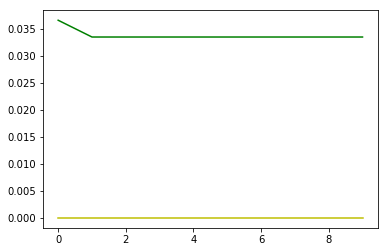

In [40]:
plt.plot(range(len(acc)), acc,'b', label="training accuracy", color='g')
plt.plot(range(len(val_acc)), val_acc,'b', label="validation accuracy", color='y')

plt.show()

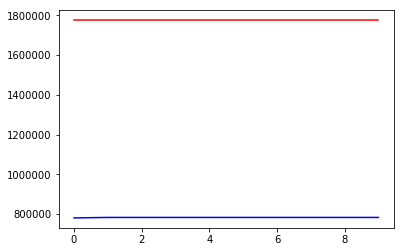

In [41]:
plt.plot(range(len(loss)), loss,'b', label="training loss", color='b')
plt.plot(range(len(val_loss)), val_loss,'b', label="validation loss", color='r')
plt.show()

In [42]:
tr = np.array([1., 1., 0.])
# model.predict(tr)
X.shape

(49093, 3)

In [43]:
tr.shape

(3,)

In [44]:
prediction = model.predict(X)

In [45]:
np.mean(val_acc)

0.0

In [46]:
np.mean(val_loss)

1775051.1555657398

In [47]:
for i in range(10):    
    prediction = model.predict(np.array([X[i]]))
    print(prediction)

[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
